In [194]:
% matplotlib inline

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.io import loadmat
from matplotlib import cm

## Exercise: Radar Altimetry Waveform

In [198]:
data = np.loadtxt('waveforms.dat')
Nf = 20
datax, datay = data.shape
N = datax/Nf

forms = np.ma.empty([Nf,N,datay])
for i in np.arange(0,Nf):
    forms[i,:,:] = data[i*N:(i+1)*N,:] 

offset = 5.3e-3 # time that the satellite wasn't recording
scale = 1e-9 # time is in nanoseconds
amp =  forms[:,:,1]
time = forms[:,:,0] 
mean_amp = np.ma.mean(amp, axis=0)
std_amp = np.ma.std(amp, axis=0)
se_amp = std_amp/Nf
mean_time = np.ma.mean(time, axis=0)

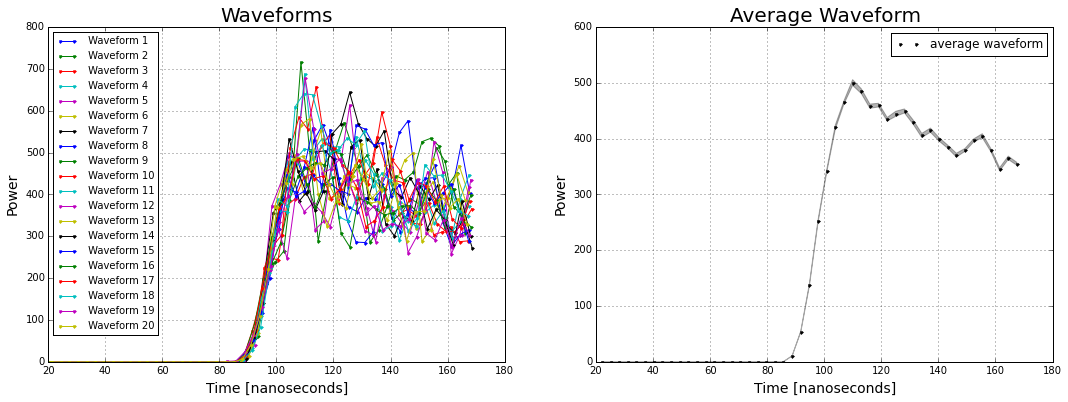

In [199]:
plt.figure(figsize=(18,6))
plt.subplot(121)
for i in range(Nf):
    plt.plot(time[i],amp[i], '.-', label=' Waveform %i'%(i+1))
    plt.hold
plt.xlabel('Time [nanoseconds]', fontsize=14)
plt.ylabel('Power', fontsize=14)
plt.title('Waveforms', fontsize=20)
plt.grid()
plt.legend(fontsize=10, loc='best')
plt.subplot(122)
plt.plot(mean_form[:,0],mean_form[:,1], '.k', label='average waveform')
plt.fill_between(mean_time, mean_amp - se_amp, mean_amp + se_amp, facecolor='black', alpha=0.3)
plt.xlabel('Time [nanoseconds]', fontsize=14)
plt.ylabel('Power', fontsize=14)
plt.title('Average Waveform', fontsize=20)
plt.grid()
plt.legend(loc='best')

In [120]:

A = mean_amp.max()
ind = (np.abs(mean_amp-A/2.)).argmin()
t = mean_time.copy()
t0 = t[ind]
first_nonzero = t[np.nonzero(mean_amp)[0][0]+3]
sig = t0 - first_nonzero
brown = (A/2.)*(1 + erf((t-t0)/(np.sqrt(2)*sig)))

In [140]:
print 'Fitting parameters:'
print 't0 = %.2f nanoseconds' %t0
print 'sigma = %.2f nanoseconds' %sig


Fitting parameters:
t0 = 97.82 nanoseconds
sigma = 6.06 nanoseconds


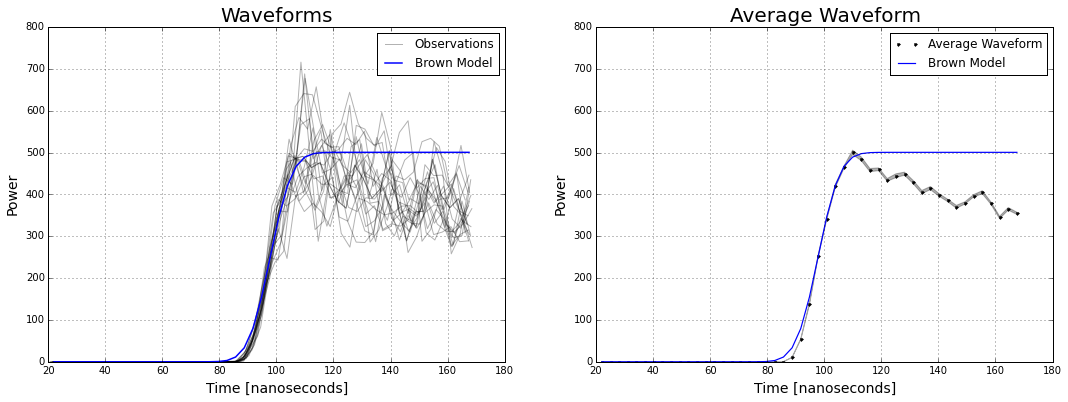

In [136]:
plt.figure(figsize=(18,6))
plt.subplot(121)
for i in range(Nf):
    plt.plot(time[i],amp[i], '-k', alpha=.3)
    plt.hold
plt.plot(time[i],amp[i], '-k', alpha=.3, label='Observations')
plt.plot(t,brown, '-b', linewidth = 1.5,label='Brown Model')
plt.legend()
plt.xlabel('Time [nanoseconds]', fontsize=14)
plt.ylabel('Power', fontsize=14)
plt.title('Waveforms', fontsize=20)
plt.grid()
plt.subplot(122)
plt.plot(mean_form[:,0],mean_form[:,1], '.k', label='Average Waveform')
plt.fill_between(mean_time, mean_amp - se_amp, mean_amp + se_amp, facecolor='black', alpha=0.3)
plt.plot(t,brown, '-b', linewidth = 1.2, label='Brown Model')
plt.xlabel('Time [nanoseconds]', fontsize=14)
plt.ylabel('Power', fontsize=14)
plt.ylim([0,800])
plt.title('Average Waveform', fontsize=20)
plt.legend()
plt.grid()

#### From the fit of the Brown model to the average waveform, we have:

$t_0 = 97.82 \times 10^{-9} + 5.3\times10^{-3}$ s 

$\sigma = 6.06 \times 10^{-9} + 5.3\times10^{-3}$ s

#### Thus we can calculate the range by:

$$r = \frac{ct_0}{2} \therefore$$

$$r = \frac{2.99792458\times 10^8 5.30009782 \times 10^{-3}}{2} \rightarrow r = 794$$

## Exercise: Using Altimetry Data

I can see the recessional terraces around Durmid Hill both in the shaded altimetry and the Google Earth imagery.

In [173]:
topo = np.ma.array(loadmat('topo.mat')['z'])
z = np.ma.masked_invalid(topo)
hist_topo, bins = np.histogram(z.compressed(),1200)


(-100, 0)

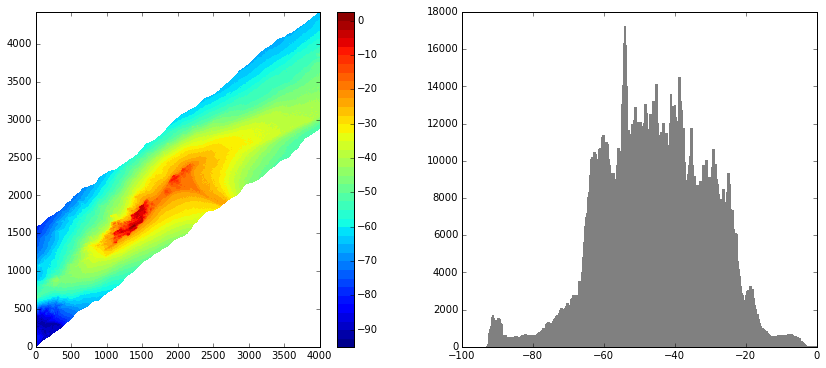

In [193]:
plt.figure(figsize=(14,6))
plt.subplot(121)
#plt.imshow(z)
plt.contourf(z,40)
plt.colorbar()
plt.subplot(122)
plt.bar(bins[:-1], hist_topo,  edgecolor='none',color='grey')
plt.xlim([-100,0])